EDA 중에서 가장 좋아요 많이 받은 게시글

https://dacon.io/competitions/official/235713/codeshare/2494?page=1&dtype=vote



## 순서 글로 정리하기

Null 데이터 체크하기  
credit 비율 살펴보기  
데이터 타입 파악하기  

변수별 신용도 EDA
plot사용해서해보기  
ex) 소득분류에 따라 신용도가 달라지는가? 등등

### 데이터 불러오기 

In [2]:
import pandas as pd
import numpy as np

In [3]:
dat = pd.read_csv('./data/train.csv')

In [4]:
dat.shape

(26457, 20)

### Null값 확인

In [56]:
dat.isnull().sum(axis=0)

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

### + 공부)
R에서는 NA는 '잘못된값', NULL은 '아직 정해지지 않은 값'으로, 서로 다른 의미를 가지고 있다.  
Python에서는 R과 다르게 NaN(NA)와 Null을 '정해지지 않은 값'의 의미로 같이 사용한다. 그렇기 때문에 NaN으로 Na와 Null을 모두 표현한다.

In [6]:
dat.dtypes

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

## y credit 비율 확인 

In [57]:
np.bincount(dat.credit) / len(dat.credit)

array([0.12178252, 0.23687493, 0.64134256])

### matplotlib 쓰다가 화나서 ggplot 구현해놓은 plotnine 사용하기 

In [29]:
import matplotlib.pyplot as plt
from plotnine import *

([<matplotlib.axis.XTick at 0x14cab22b040>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2')])

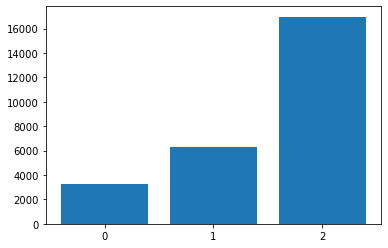

In [9]:
plt.bar(np.unique(dat.credit),np.bincount(dat.credit))
plt.xticks(np.unique(dat.credit),['0','1','2'])

In [ ]:
p9.ggplot(data=dat,p9.aes(x=credit)

In [54]:
dat1 = dat.groupby(['credit']).size().reset_index()

dat1.columns = ['credit', 'value']
dat1['credit'] = [str(a) for a in dat_g['credit']]
dat1

,credit,value
0,0.0,3222
1,1.0,6267
2,2.0,16968


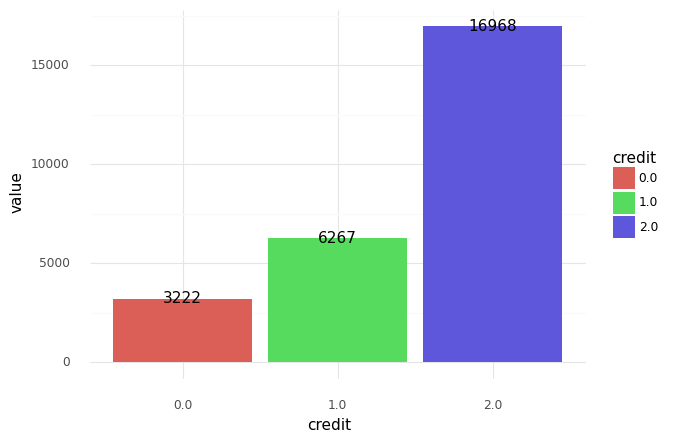

<ggplot: (89303313240)>

In [55]:
(ggplot(data=dat1, mapping=aes(x='credit',y='value', fill='credit')) 
+ geom_col() + theme_minimal()+geom_text(mapping=aes(label='value')) )


## 변수별 신용도

## 성별에 따라 신용도가 달라지는가?

In [72]:
dat.groupby('gender').size()

gender
F    17697
M     8760
dtype: int64

In [77]:
dat.groupby(['gender','credit']).size().reset_index()

,gender,credit,0
0,F,0.0,2148
1,F,1.0,4220
2,F,2.0,11329
3,M,0.0,1074
4,M,1.0,2047
5,M,2.0,5639


In [74]:
dat.groupby(['gender','credit'])['credit'].size().unstack()

credit,0.0,1.0,2.0
gender,,,
F,2148,4220,11329
M,1074,2047,5639


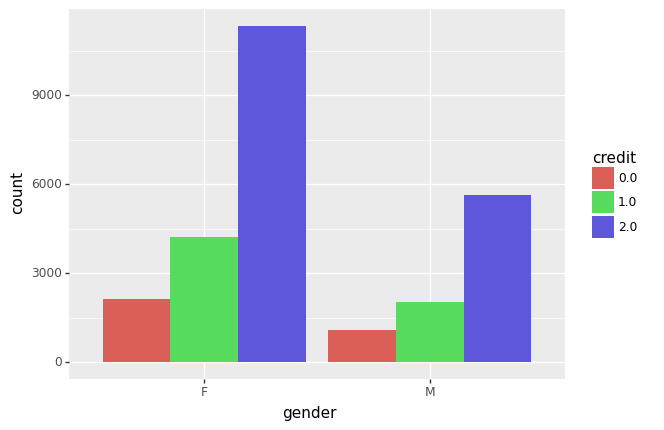

<ggplot: (89303932718)>

In [83]:
dat1 = dat.groupby(['gender','credit']).size().reset_index()
dat1.columns = ['gender', 'credit', 'count']
dat1['credit'] = [str(a) for a in dat1['credit']]
ggplot(data=dat1, mapping=aes(x='gender',y='count',fill='credit'))+geom_col(position='dodge')

그룹바이 공부
https://rfriend.tistory.com/393